<a href="https://colab.research.google.com/github/o-bissing/TF_Udemy/blob/main/Autoencoder_for_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

In [4]:
(X_train,y_train), (X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


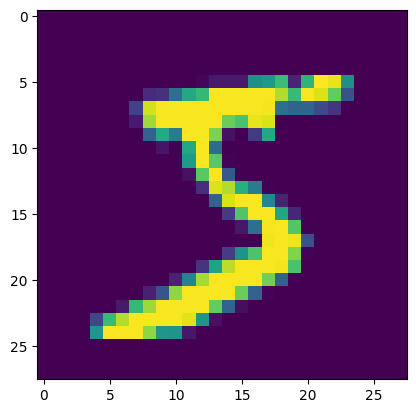

In [5]:
plt.imshow(X_train[0])

In [6]:
X_train = X_train/255
X_test = X_test/255

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD

In [9]:
28*28

784

In [10]:
784/2

392.0

In [11]:
X_train[0].shape

(28, 28)

In [12]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(400,activation='relu'))
encoder.add(Dense(200,activation='relu'))
encoder.add(Dense(100,activation='relu'))
encoder.add(Dense(50,activation='relu'))
encoder.add(Dense(25,activation='relu'))

In [13]:
25/784

0.03188775510204082

In [19]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(784,activation='sigmoid'))
decoder.add(Reshape([28,28]))

In [20]:
autoencoder = Sequential([encoder,decoder])

In [21]:
autoencoder.compile(loss='binary_crossentropy',
                    optimizer=SGD(learning_rate=1.5),
                    metrics=['accuracy'])

In [22]:
autoencoder.fit(X_train,X_train,epochs=5,
                validation_data=[X_test,X_test])

Epoch 1/5
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2548 - accuracy: 0.0818 - val_loss: 0.2277 - val_accuracy: 0.1069
Epoch 2/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1950 - accuracy: 0.1494 - val_loss: 0.1755 - val_accuracy: 0.1617
Epoch 3/5
1875/1875 [==============================] - 22s 11ms/step - loss: 0.1624 - accuracy: 0.1934 - val_loss: 0.1536 - val_accuracy: 0.2049
Epoch 4/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1515 - accuracy: 0.2101 - val_loss: 0.1457 - val_accuracy: 0.2144
Epoch 5/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1439 - accuracy: 0.2213 - val_loss: 0.1432 - val_accuracy: 0.2168


In [23]:
passed_images = autoencoder.predict(X_test[:10])

1/1 [==============================] - 1s 515ms/step


Original Image


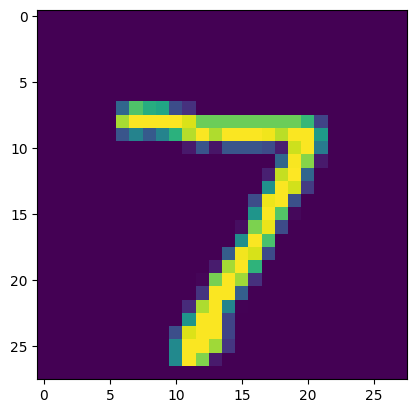

Attempted Reconstruction (after autoencoder)


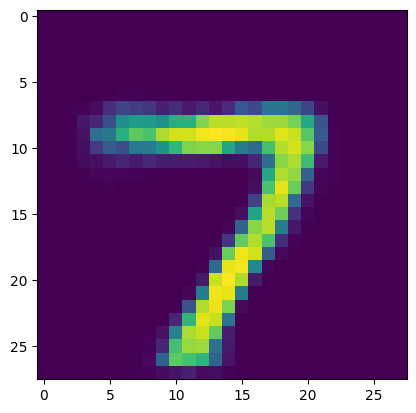

In [24]:
n = 0
print("Original Image")
plt.imshow(X_test[n])
plt.show()
print("Attempted Reconstruction (after autoencoder)")
plt.imshow(passed_images[n])

# Noise removal

In [25]:
from tensorflow.keras.layers import GaussianNoise

In [26]:
sample = GaussianNoise(0.2)

In [27]:
noisey = sample(X_test[:10],training=True)

Original


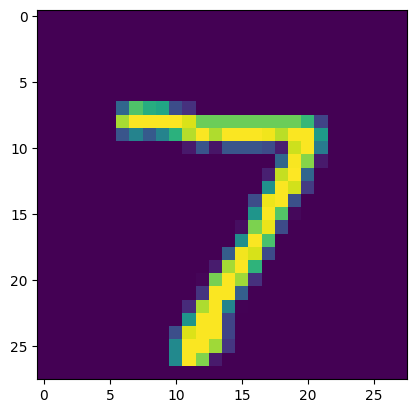

Noise version


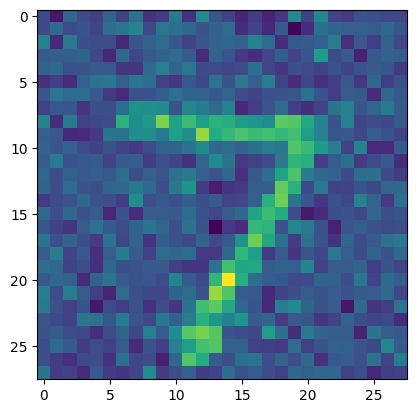

In [28]:
n = 0
print("Original")
plt.imshow(X_test[n])
plt.show()
print("Noise version")
plt.imshow(noisey[n])
plt.show()

In [29]:
import tensorflow as tf

In [30]:
tf.random.set_seed(101)

encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))

encoder.add(GaussianNoise(0.2))

encoder.add(Dense(400,activation='relu'))
encoder.add(Dense(200,activation='relu'))
encoder.add(Dense(100,activation='relu'))
encoder.add(Dense(50,activation='relu'))
encoder.add(Dense(25,activation='relu'))

In [31]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(784,activation='sigmoid'))
decoder.add(Reshape([28,28]))

In [32]:
noise_remover = Sequential([encoder,decoder])
noise_remover.compile(loss='binary_crossentropy',
                      optimizer='adam',
                      metrics=['accuracy'])

In [33]:
noise_remover.fit(X_train,X_train,epochs=8)

Epoch 1/8
1875/1875 [==============================] - 35s 18ms/step - loss: 0.1667 - accuracy: 0.1836
Epoch 2/8
1875/1875 [==============================] - 42s 22ms/step - loss: 0.1295 - accuracy: 0.2299
Epoch 3/8
1875/1875 [==============================] - 41s 22ms/step - loss: 0.1206 - accuracy: 0.2442
Epoch 4/8
1875/1875 [==============================] - 46s 25ms/step - loss: 0.1158 - accuracy: 0.2527
Epoch 5/8
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1132 - accuracy: 0.2579
Epoch 6/8
1875/1875 [==============================] - 29s 16ms/step - loss: 0.1112 - accuracy: 0.2612
Epoch 7/8
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1094 - accuracy: 0.2651
Epoch 8/8
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1077 - accuracy: 0.2688


In [34]:
ten_noisey_images = sample(X_test[:10],training=True)

In [35]:
denoised = noise_remover(ten_noisey_images)

Original Image


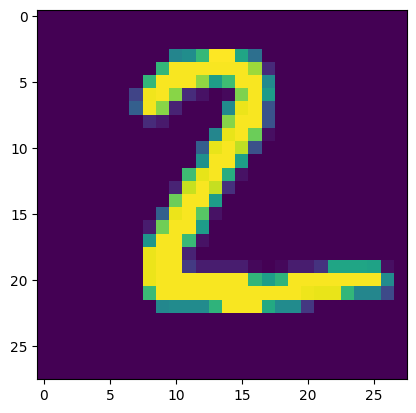

Noise added Image


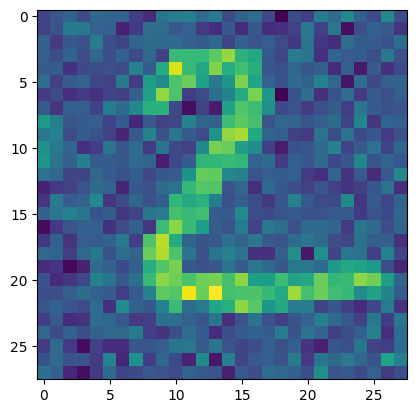

After noise removal from autoencoder


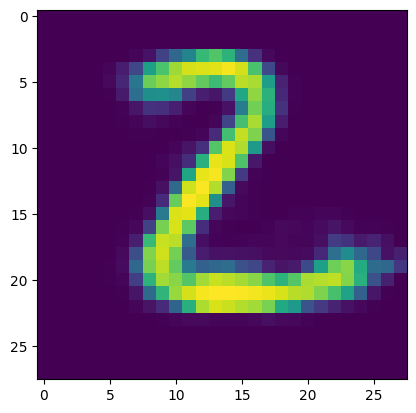

In [39]:
n=1
print("Original Image")
plt.imshow(X_test[n])
plt.show()
print("Noise added Image")
plt.imshow(ten_noisey_images[n])
plt.show()
print("After noise removal from autoencoder")
plt.imshow(denoised[n])
plt.show()